<a href="https://colab.research.google.com/github/pongsapaks/Data-science/blob/main/Book_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


df = pd.read_csv('https://raw.githubusercontent.com/pongsapaks/Data-science/main/log2.csv')  
df.shape

ModuleNotFoundError: No module named 'pandas'

In [3]:
# Load the dataset
df = pd.read_csv('log2.csv')

# Split the dataset into features (X) and target variable (y)
X = df.drop(['Action'], axis=1)
y = df['Action']

In [58]:
from sklearn.model_selection import train_test_split
X_trainBasic, X_testBasic, y_trainBasic, y_testBasic = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=42)

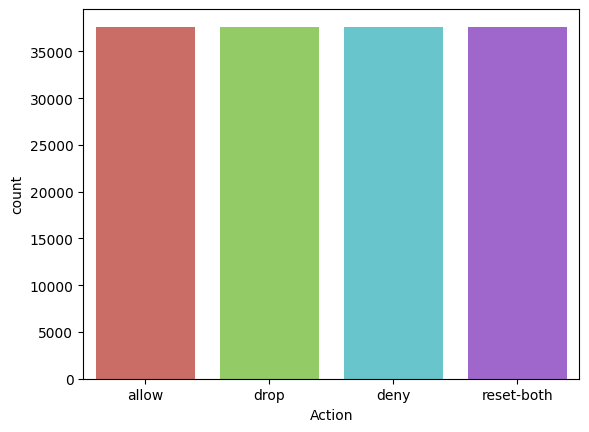

In [7]:
#Oversampling (Imbalance Step)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE (regular, svm)
sm = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = sm.fit_resample(X, y)

pca = PCA(n_components=4)
X_res_vis = pca.fit_transform(X_resampled)
sns.countplot(x=y_resampled,data=df,palette='hls')
plt.show()

In [9]:
#Check Shapiro test (Normal distribution)
import scipy.stats
scipy.stats.shapiro(X_resampled)

ShapiroResult(statistic=0.0008412003517150879, pvalue=0.0)

In [11]:
#Normalization
x_normal= (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled))
x_normal

C:\Users\princ\AppData\Local\Temp\ipykernel_348\4136689421.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  x_normal= (X_resampled - np.min(X_resampled)) / (np.max(X_resampled) / np.min(X_resampled))


,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
150555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA - data for KNN

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_normal, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

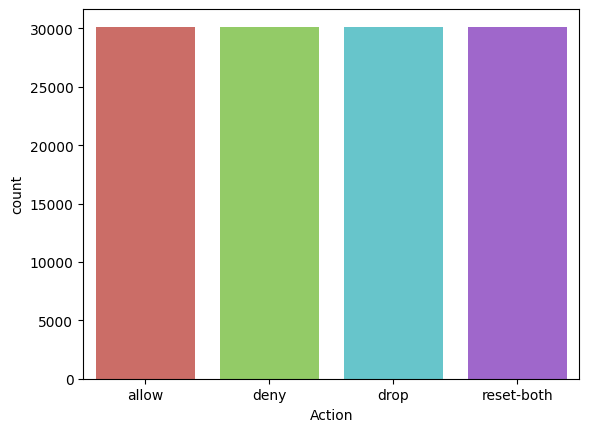

In [13]:
sns.countplot(x=y_train,data=df,palette='hls')
plt.show()

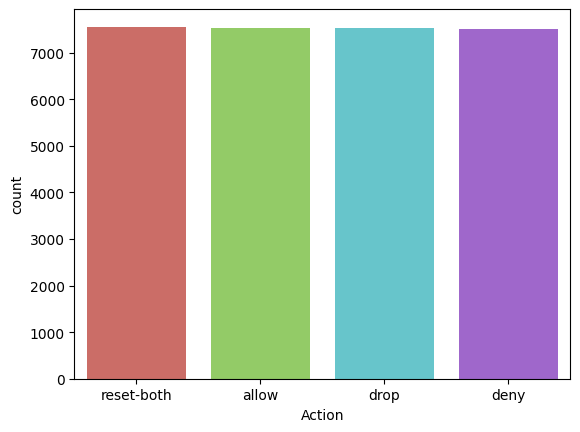

In [14]:
sns.countplot(x=y_test,data=df,palette='hls')
plt.show()

## EDA - data for trees

In [15]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features=4)
sel.fit(X_resampled, y_resampled)
sel.get_support()
selected_feat= X_resampled.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)
 
X_tree = X_resampled.loc[:,selected_feat]
X_tree
 
X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X_tree, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

4
Index(['Destination Port', 'Bytes', 'Bytes Sent', 'Elapsed Time (sec)'], dtype='object')


# Decision Tree Clasification

In [ ]:
# 1) Decision Tree Classification using all 'Default' parameters (gini, best splitter, 2 min sample split, 1 min sample leaf) 

from sklearn.tree import DecisionTreeClassifier                             
classifier_initial = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
classifier_initial.fit(X_trainTree, y_trainTree)   

In [ ]:
y_predicted_initial = classifier_initial.predict(X_testTree) 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy Gini:", metrics.accuracy_score(y_testTree, y_predicted_initial))

In [ ]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_initial})  
data_p

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_initial))  
print(classification_report(y_testTree, y_predicted_initial)) 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_initial, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_initial, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['allow','deny','drop','reset-both'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile.png')
Image(graph.create_png())

In [ ]:
# Use Grid Search for tuning hyperparameters

from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 4, 5, 10, 15, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
# 2) Decision Tree Classification using gini, splitter = best, max_depth = 10, min_samples_leaf = 5, ccp_alpha = 0.0175

from sklearn.tree import DecisionTreeClassifier                             
classifier_final = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth = 10, min_samples_split=2, min_samples_leaf= 5, ccp_alpha=0.0175)
classifier_final.fit(X_trainTree, y_trainTree)   

In [ ]:
y_predicted_final = classifier_final.predict(X_testTree) 

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
print("Accuracy after tuning hyperparameters:", metrics.accuracy_score(y_testTree, y_predicted_final))

In [ ]:
data_p = pd.DataFrame({'Actual':y_testTree, 'Predicted':y_predicted_final})  
data_p

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_testTree, y_predicted_final))  
print(classification_report(y_testTree, y_predicted_final)) 

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_final, X_trainTree, y_trainTree, cv = 5)
print("Cross validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

features = ['Destination Port','Bytes','Bytes Sent','Elapsed Time (sec)']
dot_data = StringIO()
export_graphviz(classifier_final, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names =features,class_names=['drop','deny','reset-both','allow'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('FirewallLogFile.png')
Image(graph.create_png())

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

X_tree = X_resampled.loc[:,selected_feat]
X_tree

## Split data for learning 
X_trainTree, X_testTree, y_trainTree, y_testTree = train_test_split(X_tree, y_resampled,train_size=0.8, test_size=0.2, random_state=42)

## training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_trainTree, y_trainTree)

## find y predict
y_pred = clf.predict(X_testTree)

#measure accuracy
accuracy = accuracy_score(y_testTree, y_pred)
print("Accuracy:", accuracy)


In [ ]:
df = pd.DataFrame(y_pred)
counts = df.apply(pd.Series.value_counts).reset_index()
counts = counts.rename(columns={0:'y_pred','index':'action'})
counts

In [ ]:
dff = pd.DataFrame(y_testTree)
count_dff = dff.apply(pd.Series.value_counts).reset_index()
count_dff = count_dff.rename(columns={'Action':'y_testTree','index':'action'})
count_dff

In [ ]:
merged = count_dff.merge(counts, on='action', how='inner')
merged

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_trainTree, y_trainTree)

print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


## XG boost

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

clf.fit(X_trainTree, y_trainTree)
print(clf.score(X_trainTree, y_trainTree))
print(clf.best_params_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
423360 fits failed out of a total of 846720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
246961 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "c:\Python311\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", line 97, in v

0.9190688097768331
{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.13636363636363638, 'n_estimators': 10, 'subsample': 1.0}


In [1]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

xgboost = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.2, min_samples_split = 0.13636363636363638,
                                     min_samples_leaf = 0.1, max_depth = 5
                                    ,max_features = 'sqrt', criterion = 'friedman_mse', subsample = 1.0, n_estimators = 10)


#'criterion': 'friedman_mse', 'learning_rate': 0.2,
#'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 
#'min_samples_leaf': 0.1, 'min_samples_split': 0.13636363636363638, 'n_estimators': 10, 'subsample': 1.0
xgboost.fit(X_trainTree,y_trainTree)
answer = xgboost.predict(X_testTree)
print(classification_report(y_testTree, answer))

ModuleNotFoundError: No module named 'sklearn'